In [1]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
smdata = pd.read_csv("socialmedia.csv")

In [3]:
smdata.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
del smdata["User ID"]

In [5]:
smdata.describe(include="all")

,Gender,Age,EstimatedSalary,Purchased
count,400,400.000000,400.000000,400.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,204,NaN,NaN,NaN
mean,NaN,37.655000,69742.500000,0.357500
std,NaN,10.482877,34096.960282,0.479864
min,NaN,18.000000,15000.000000,0.000000
25%,NaN,29.750000,43000.000000,0.000000
50%,NaN,37.000000,70000.000000,0.000000
75%,NaN,46.000000,88000.000000,1.000000


In [6]:
smdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A802834948>,
      dtype=object)

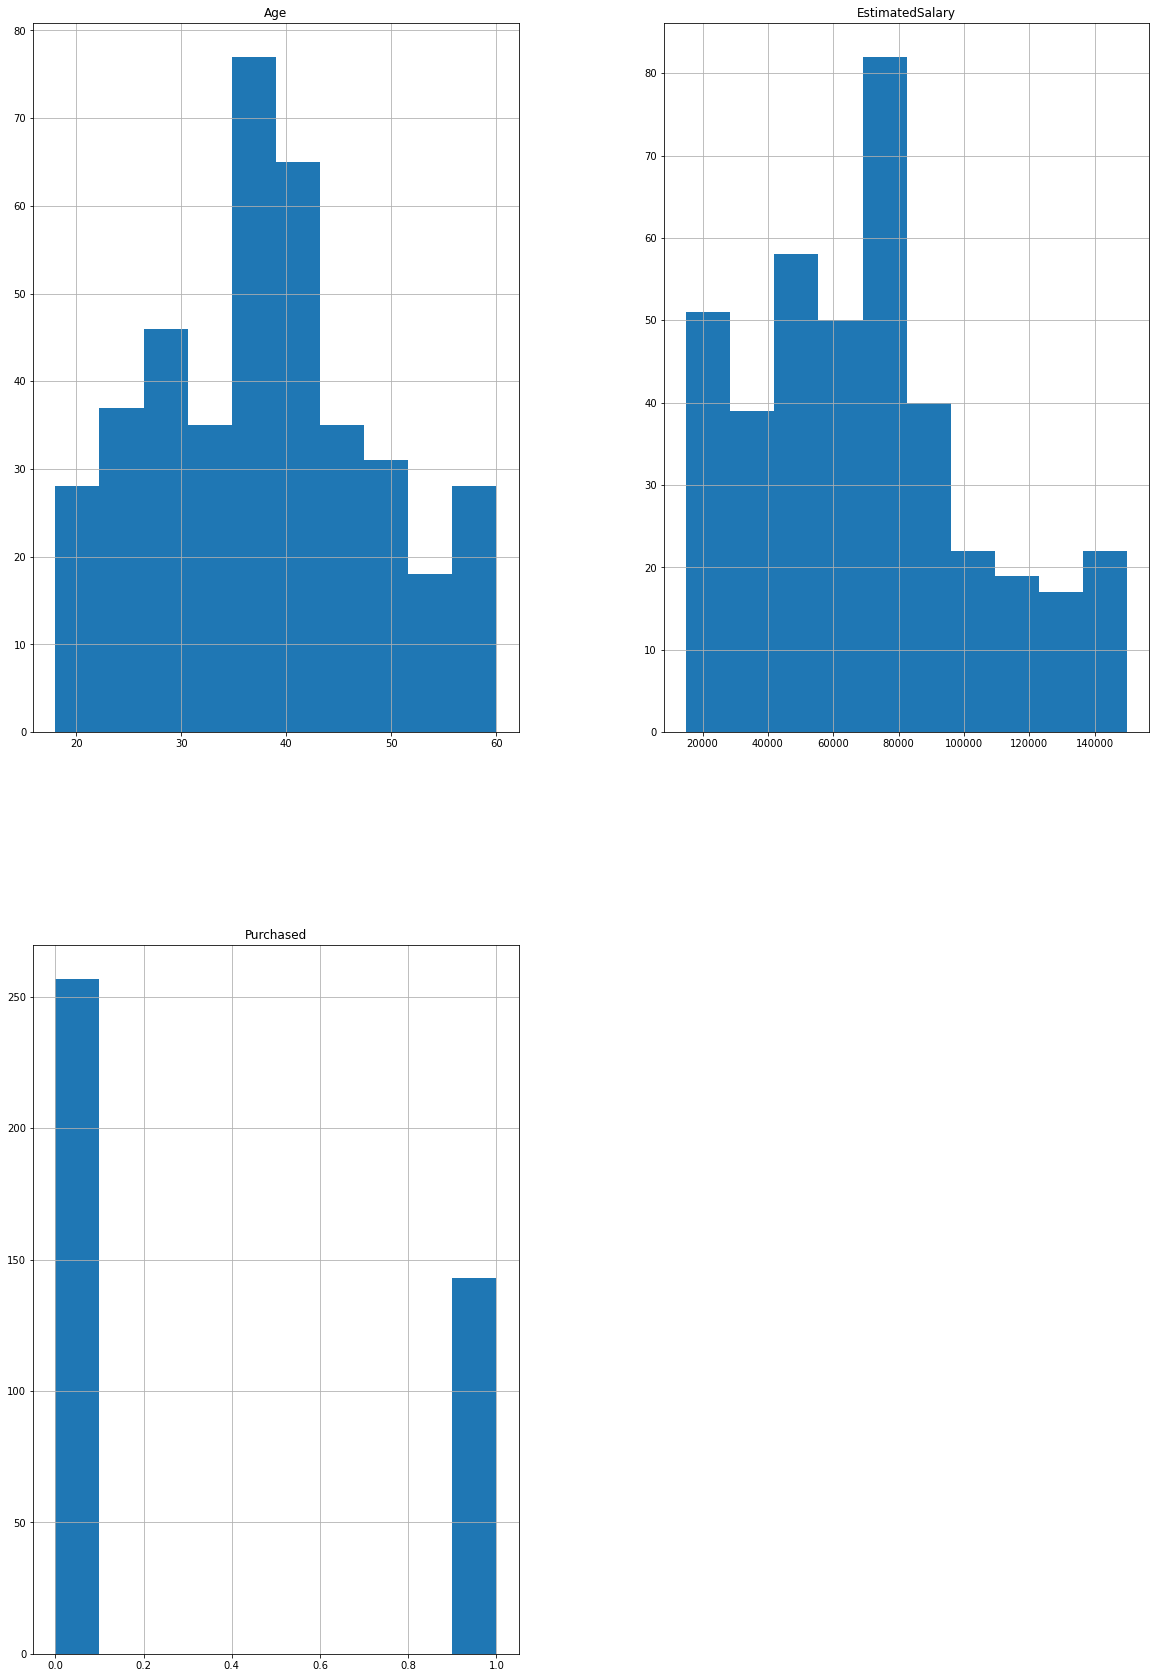

In [7]:
%matplotlib inline

smdata.hist(figsize=(20,30))

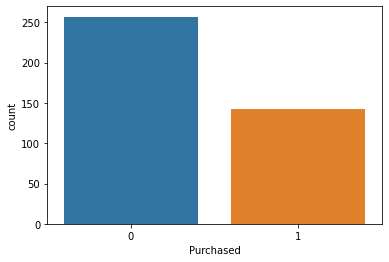

In [8]:
sns.countplot(smdata['Purchased'],label="Count")

<function matplotlib.pyplot.show(*args, **kw)>

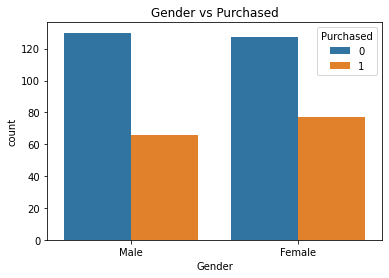

In [9]:
sns.countplot(smdata["Gender"], hue=smdata["Purchased"])
plt.title("Gender vs Purchased")
plt.legend(title="Purchased", loc='upper right')
plt.show

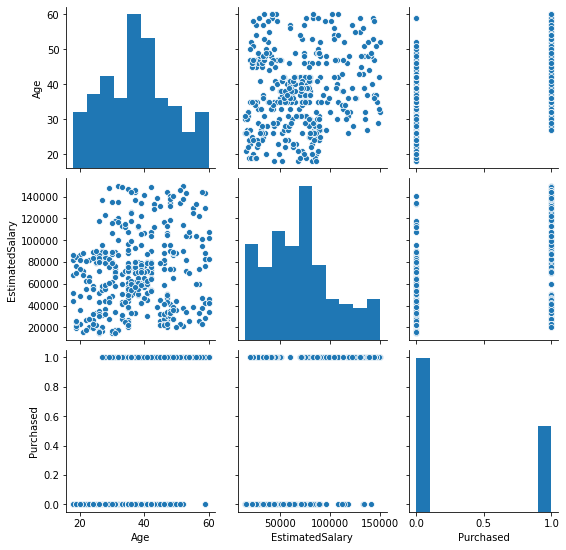

In [10]:
sns.pairplot(smdata)

In [11]:
corr = smdata.corr()
corr

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
smdata["Gender"]= labelencoder.fit_transform(smdata["Gender"].values)

In [33]:
X = smdata.iloc[:, 0:3].values 
Y = smdata.iloc[:, -1].values 

In [15]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [16]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)


  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, forest

In [36]:
#Get and train all of the models
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.621875
[1]K Nearest Neighbor Training Accuracy: 0.871875
[6]Random Forest Classifier Training Accuracy: 1.0


In [43]:
newtest = np.array([[1,47,25000]]) 

In [44]:
#Print Prediction of Random Forest Classifier model
pred = model[1].predict(newtest)
print(pred)

#Print a space
#print()

#Print the actual values
#print(Y_test)

# 1 - did purchase
# 0 - did not purchase

[1]
